# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.107107e+01     7.291843e+00
 * time: 0.004687786102294922
     1     2.876062e+01     5.700959e+00
 * time: 0.013830900192260742
     2     2.304645e+01     8.538451e+00
 * time: 0.035635948181152344
     3     1.369228e+01     3.329003e+00
 * time: 0.06287288665771484
     4     1.344589e+01     4.949706e+00
 * time: 0.07953095436096191
     5     1.267577e+01     2.016079e+00
 * time: 0.09606385231018066
     6     1.030306e+01     1.828672e+00
 * time: 0.11199092864990234
     7     9.804730e+00     1.001051e+00
 * time: 0.12796688079833984
     8     9.348828e+00     1.100985e+00
 * time: 0.14391088485717773
     9     9.085456e+00     9.168852e-01
 * time: 0.16001176834106445
    10     8.894131e+00     5.946768e-01
 * time: 0.17604899406433105
    11     8.780160e+00     5.250814e-01
 * time: 0.18827080726623535
    12     8.722700e+00     5.630382e-01
 * time: 0.20036077499389648
    13     8.643762e+00     3.687352e-01
 * ti

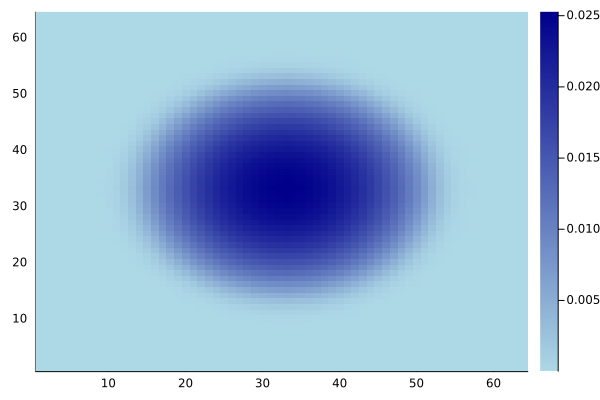

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)